# Packages

In [1]:
import numpy as np 
import pandas as pd 
import csv
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
%matplotlib inline
 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import pickle
from sklearn import tree


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer 
from sklearn.ensemble import VotingClassifier


#!pip install gensim
import gensim
from gensim.models import Word2Vec
import logging
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarangs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data

In [2]:
data=pd.read_excel("../data_24_09_2022.xlsx")
data.head(5)

,S#,teacher/course,comments,sentiment,aspect,user
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan
3,4,teacher,great teacher,positive,general,Adnan
4,5,teacher,good sense of humor,positive,general,Adnan


# Exploratory Data Analysis

In [3]:
#total number of instances
print('There are', len(data), 'data points.')

There are 21254 data points.


In [4]:
#attributes in datasets
for i, col in enumerate(data.columns):
    print(i, col)

0 S#
1 teacher/course
2 comments
3 sentiment
4 aspect
5 user


teacher    13313
course      7939
Name: teacher/course, dtype: int64


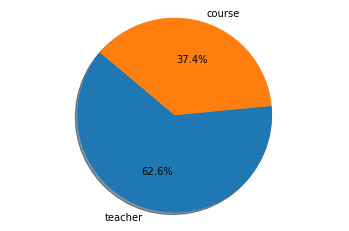

In [6]:
#distribution of polarity column
print(data['teacher/course'].value_counts())


# Pie chart, where the slices shows the distribution of polarity column:
labels = 'teacher','course'
sizes = data['teacher/course'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
#calculating the length of sentences in text column 
data['length']=data['comments'].apply(len)
data.head()

,S#,teacher/course,comments,sentiment,aspect,user,length
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67
3,4,teacher,great teacher,positive,general,Adnan,13
4,5,teacher,good sense of humor,positive,general,Adnan,19


<AxesSubplot:ylabel='Frequency'>

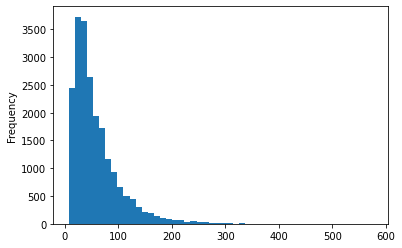

In [8]:
data['length'].plot(bins=50,kind='hist')

# Preprocessing 

In [9]:
def text_process(text):
    text = text.lower()    
    #Remove white space
    text = text.strip()    
    #Remove hashtags
    text = re.sub(r'#([^\s]+)', '', text)   
    #Remove punctuation
    text = "".join(l for l in text if l not in string.punctuation)
    return text

In [10]:
data_subset = data
data_subset['comments_clean']=data_subset['comments'].apply(text_process)
data_subset.head(10)

,S#,teacher/course,comments,sentiment,aspect,user,length,comments_clean
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23,way of teaching is good
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58,i have already written for my teacher that he ...
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67,best teacher with friendly nature and polite ...
3,4,teacher,great teacher,positive,general,Adnan,13,great teacher
4,5,teacher,good sense of humor,positive,general,Adnan,19,good sense of humor
5,6,teacher,sir is such a nice and inspirational teacher.,positive,general,Adnan,45,sir is such a nice and inspirational teacher
6,7,teacher,he is very polite and supportive to his students.,positive,behaviour,Adnan,49,he is very polite and supportive to his students
7,8,teacher,he guides us very well.,positive,general,Adnan,23,he guides us very well
8,9,teacher,i would like thank him for all of his teachings.,positive,teaching skills,Adnan,48,i would like thank him for all of his teachings
9,10,teacher,when the teacher was coming in the class he wa...,positive,teaching skills,Adnan,183,when the teacher was coming in the class he wa...


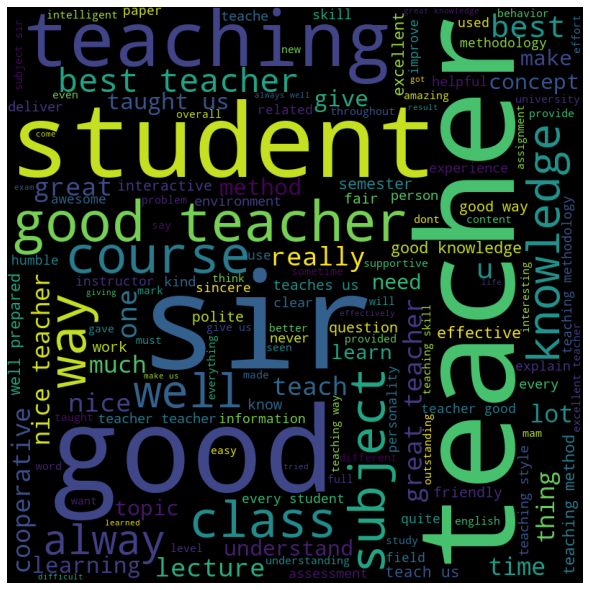

In [11]:
#word cloud for teacher 
df = data_subset[data_subset['teacher/course']=='teacher']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.comments_clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

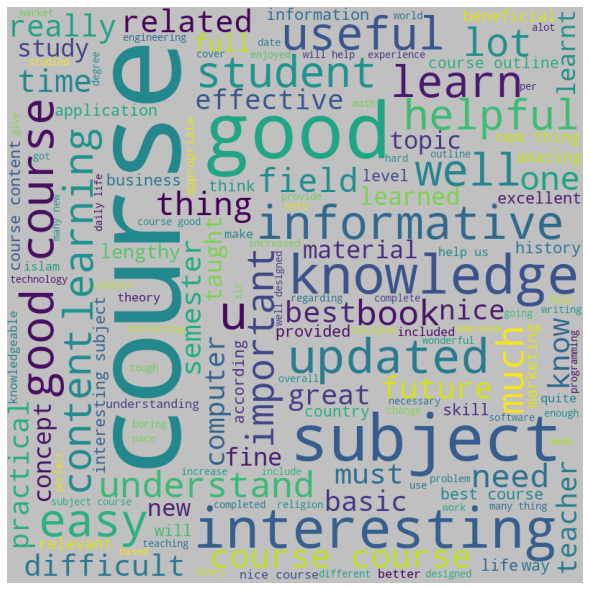

In [12]:
#word cloud for course 
df = data_subset[data_subset['teacher/course']=='course']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.comments_clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='silver', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [13]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Removing stop words
stop = stopwords.words('english')

data_subset['comments_without_stopwords'] = data_subset['comments_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# TOKENIZATION
tt = TweetTokenizer()
data_subset['tokenised_comments'] = data_subset['comments_without_stopwords'].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()
data_subset['lemmatize'] = data_subset['tokenised_comments'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [14]:
data_subset.head(-1)

,S#,teacher/course,comments,sentiment,aspect,user,length,comments_clean,comments_without_stopwords,tokenised_comments,lemmatize
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23,way of teaching is good,way teaching good,"[way, teaching, good]","[way, teaching, good]"
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58,i have already written for my teacher that he ...,already written teacher best,"[already, written, teacher, best]","[already, written, teacher, best]"
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67,best teacher with friendly nature and polite ...,best teacher friendly nature polite talented s...,"[best, teacher, friendly, nature, polite, tale...","[best, teacher, friendly, nature, polite, tale..."
3,4,teacher,great teacher,positive,general,Adnan,13,great teacher,great teacher,"[great, teacher]","[great, teacher]"
4,5,teacher,good sense of humor,positive,general,Adnan,19,good sense of humor,good sense humor,"[good, sense, humor]","[good, sense, humor]"
...,...,...,...,...,...,...,...,...,...,...,...
21248,3046,teacher,less feedback oriented.,negative,general,Tufail,23,less feedback oriented,less feedback oriented,"[less, feedback, oriented]","[le, feedback, oriented]"
21249,3047,teacher,fair and good assessment.,positive,assessment,Tufail,25,fair and good assessment,fair good assessment,"[fair, good, assessment]","[fair, good, assessment]"
21250,3048,teacher,teacher was always well prepared for subject.,positive,teaching skills,Tufail,45,teacher was always well prepared for subject,teacher always well prepared subject,"[teacher, always, well, prepared, subject]","[teacher, always, well, prepared, subject]"
21251,3049,teacher,he is really a nice man. he also keeps class a...,positive,general,Tufail,141,he is really a nice man he also keeps class ac...,really nice man also keeps class active intere...,"[really, nice, man, also, keeps, class, active...","[really, nice, man, also, keep, class, active,..."


In [15]:
#rejoin words
def rejoin_words(train_data_subset):
    my_list = train_data_subset['lemmatize']
    joined_words = ( " ".join(my_list))
    return joined_words

data_subset['processed'] = data_subset.apply(rejoin_words, axis=1)

In [16]:
data_subset.head(-1)

,S#,teacher/course,comments,sentiment,aspect,user,length,comments_clean,comments_without_stopwords,tokenised_comments,lemmatize,processed
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23,way of teaching is good,way teaching good,"[way, teaching, good]","[way, teaching, good]",way teaching good
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58,i have already written for my teacher that he ...,already written teacher best,"[already, written, teacher, best]","[already, written, teacher, best]",already written teacher best
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67,best teacher with friendly nature and polite ...,best teacher friendly nature polite talented s...,"[best, teacher, friendly, nature, polite, tale...","[best, teacher, friendly, nature, polite, tale...",best teacher friendly nature polite talented s...
3,4,teacher,great teacher,positive,general,Adnan,13,great teacher,great teacher,"[great, teacher]","[great, teacher]",great teacher
4,5,teacher,good sense of humor,positive,general,Adnan,19,good sense of humor,good sense humor,"[good, sense, humor]","[good, sense, humor]",good sense humor
...,...,...,...,...,...,...,...,...,...,...,...,...
21248,3046,teacher,less feedback oriented.,negative,general,Tufail,23,less feedback oriented,less feedback oriented,"[less, feedback, oriented]","[le, feedback, oriented]",le feedback oriented
21249,3047,teacher,fair and good assessment.,positive,assessment,Tufail,25,fair and good assessment,fair good assessment,"[fair, good, assessment]","[fair, good, assessment]",fair good assessment
21250,3048,teacher,teacher was always well prepared for subject.,positive,teaching skills,Tufail,45,teacher was always well prepared for subject,teacher always well prepared subject,"[teacher, always, well, prepared, subject]","[teacher, always, well, prepared, subject]",teacher always well prepared subject
21251,3049,teacher,he is really a nice man. he also keeps class a...,positive,general,Tufail,141,he is really a nice man he also keeps class ac...,really nice man also keeps class active intere...,"[really, nice, man, also, keeps, class, active...","[really, nice, man, also, keep, class, active,...",really nice man also keep class active interes...


In [17]:
data_subset.to_excel('../data_24_09_2022_cleaned.xlsx', index=False)

# Teacher Data

In [27]:
data_subset = data_subset[data_subset['teacher/course'] == 'teacher']
data_subset.head(-1)

,S#,teacher/course,comments,sentiment,aspect,user,length,comments_clean,comments_without_stopwords,tokenised_comments,lemmatize,processed,teacher_course_numeric,sentiment_numeric,aspect_numeric
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23,way of teaching is good,way teaching good,"[way, teaching, good]","[way, teaching, good]",way teaching good,1,1,1
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58,i have already written for my teacher that he ...,already written teacher best,"[already, written, teacher, best]","[already, written, teacher, best]",already written teacher best,1,1,2
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67,best teacher with friendly nature and polite ...,best teacher friendly nature polite talented s...,"[best, teacher, friendly, nature, polite, tale...","[best, teacher, friendly, nature, polite, tale...",best teacher friendly nature polite talented s...,1,1,2
3,4,teacher,great teacher,positive,general,Adnan,13,great teacher,great teacher,"[great, teacher]","[great, teacher]",great teacher,1,1,2
4,5,teacher,good sense of humor,positive,general,Adnan,19,good sense of humor,good sense humor,"[good, sense, humor]","[good, sense, humor]",good sense humor,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21248,3046,teacher,less feedback oriented.,negative,general,Tufail,23,less feedback oriented,less feedback oriented,"[less, feedback, oriented]","[le, feedback, oriented]",le feedback oriented,1,3,2
21249,3047,teacher,fair and good assessment.,positive,assessment,Tufail,25,fair and good assessment,fair good assessment,"[fair, good, assessment]","[fair, good, assessment]",fair good assessment,1,1,8
21250,3048,teacher,teacher was always well prepared for subject.,positive,teaching skills,Tufail,45,teacher was always well prepared for subject,teacher always well prepared subject,"[teacher, always, well, prepared, subject]","[teacher, always, well, prepared, subject]",teacher always well prepared subject,1,1,1
21251,3049,teacher,he is really a nice man. he also keeps class a...,positive,general,Tufail,141,he is really a nice man he also keeps class ac...,really nice man also keeps class active intere...,"[really, nice, man, also, keeps, class, active...","[really, nice, man, also, keep, class, active,...",really nice man also keep class active interes...,1,1,2


# Categorical Encoding

In [28]:
data_subset['teacher_course_numeric'] = pd.factorize(data_subset['teacher/course'])[0] + 1
data_subset['sentiment_numeric'] = pd.factorize(data_subset['sentiment'])[0] + 1
data_subset['aspect_numeric'] = pd.factorize(data_subset['aspect'])[0] + 1

In [29]:
data_subset.head(-1)

,S#,teacher/course,comments,sentiment,aspect,user,length,comments_clean,comments_without_stopwords,tokenised_comments,lemmatize,processed,teacher_course_numeric,sentiment_numeric,aspect_numeric
0,1,teacher,way of teaching is good,positive,teaching skills,Adnan,23,way of teaching is good,way teaching good,"[way, teaching, good]","[way, teaching, good]",way teaching good,1,1,1
1,2,teacher,i have already written for my teacher. that he...,positive,general,Adnan,58,i have already written for my teacher that he ...,already written teacher best,"[already, written, teacher, best]","[already, written, teacher, best]",already written teacher best,1,1,2
2,3,teacher,"best teacher with friendly nature and polite ,...",positive,general,Adnan,67,best teacher with friendly nature and polite ...,best teacher friendly nature polite talented s...,"[best, teacher, friendly, nature, polite, tale...","[best, teacher, friendly, nature, polite, tale...",best teacher friendly nature polite talented s...,1,1,2
3,4,teacher,great teacher,positive,general,Adnan,13,great teacher,great teacher,"[great, teacher]","[great, teacher]",great teacher,1,1,2
4,5,teacher,good sense of humor,positive,general,Adnan,19,good sense of humor,good sense humor,"[good, sense, humor]","[good, sense, humor]",good sense humor,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21248,3046,teacher,less feedback oriented.,negative,general,Tufail,23,less feedback oriented,less feedback oriented,"[less, feedback, oriented]","[le, feedback, oriented]",le feedback oriented,1,2,2
21249,3047,teacher,fair and good assessment.,positive,assessment,Tufail,25,fair and good assessment,fair good assessment,"[fair, good, assessment]","[fair, good, assessment]",fair good assessment,1,1,5
21250,3048,teacher,teacher was always well prepared for subject.,positive,teaching skills,Tufail,45,teacher was always well prepared for subject,teacher always well prepared subject,"[teacher, always, well, prepared, subject]","[teacher, always, well, prepared, subject]",teacher always well prepared subject,1,1,1
21251,3049,teacher,he is really a nice man. he also keeps class a...,positive,general,Tufail,141,he is really a nice man he also keeps class ac...,really nice man also keeps class active intere...,"[really, nice, man, also, keeps, class, active...","[really, nice, man, also, keep, class, active,...",really nice man also keep class active interes...,1,1,2


# Training Model Using Bigram with TFIDF

# Feature Engineering 

In [30]:
vectorisor = CountVectorizer(ngram_range = (1, 2),decode_error="replace")
vec_train =vectorisor.fit_transform(data_subset['processed'])

pickle.dump(vectorisor.vocabulary_,open("feature_bigram_teacher.pkl","wb"))

In [31]:
transformer=TfidfTransformer()
loadede_vec=CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature_bigram_teacher.pkl","rb")))
tfidf=transformer.fit_transform(loadede_vec.fit_transform(data_subset['processed']))

In [32]:
print(data_subset['teacher/course'].value_counts())
print(data_subset['teacher_course_numeric'].value_counts())

teacher    13313
Name: teacher/course, dtype: int64
1    13313
Name: teacher_course_numeric, dtype: int64


In [33]:
print(data_subset['sentiment'].value_counts())
print(data_subset['sentiment_numeric'].value_counts())

positive    10863
negative     2425
neutral        25
Name: sentiment, dtype: int64
1    10863
2     2425
3       25
Name: sentiment_numeric, dtype: int64


In [34]:
print(data_subset['aspect'].value_counts())
print(data_subset['aspect_numeric'].value_counts())

general            5546
teaching skills    4018
knowledge          1389
behaviour          1314
assessment          678
experience          368
Name: aspect, dtype: int64
2    5546
1    4018
4    1389
3    1314
5     678
6     368
Name: aspect_numeric, dtype: int64


# Performance of Classifiers Using Train Test Split (Teacher Aspect Classification) 

In [35]:
#Data Splitting into Train Test Sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data_subset['aspect_numeric'], test_size=0.2, random_state=42)

a, b = np.unique(y_test,return_counts=True)
print(a)
print(b)

a, b = np.unique(y_train,return_counts=True)
print(a)
print(b)

[1 2 3 4 5 6]
[ 794 1076  274  280  163   76]
[1 2 3 4 5 6]
[3224 4470 1040 1109  515  292]


C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr : 0.817123544874202

Classification Report: 
               precision    recall  f1-score   support

           1       0.85      0.81      0.83       794
           2       0.76      0.90      0.82      1076
           3       0.87      0.59      0.70       274
           4       0.88      0.82      0.85       280
           5       0.97      0.81      0.88       163
           6       0.83      0.57      0.67        76

    accuracy                           0.82      2663
   macro avg       0.86      0.75      0.79      2663
weighted avg       0.83      0.82      0.81      2663




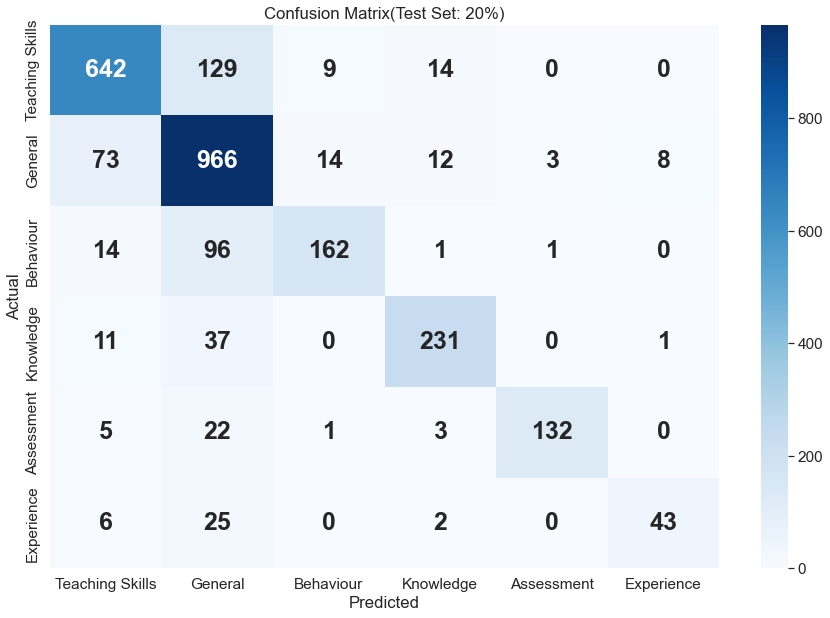

mnb : 0.628989861058956

Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.74      0.75       794
           2       0.55      0.92      0.69      1076
           3       0.96      0.10      0.18       274
           4       1.00      0.17      0.30       280
           5       1.00      0.15      0.26       163
           6       0.00      0.00      0.00        76

    accuracy                           0.63      2663
   macro avg       0.71      0.35      0.36      2663
weighted avg       0.71      0.63      0.57      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


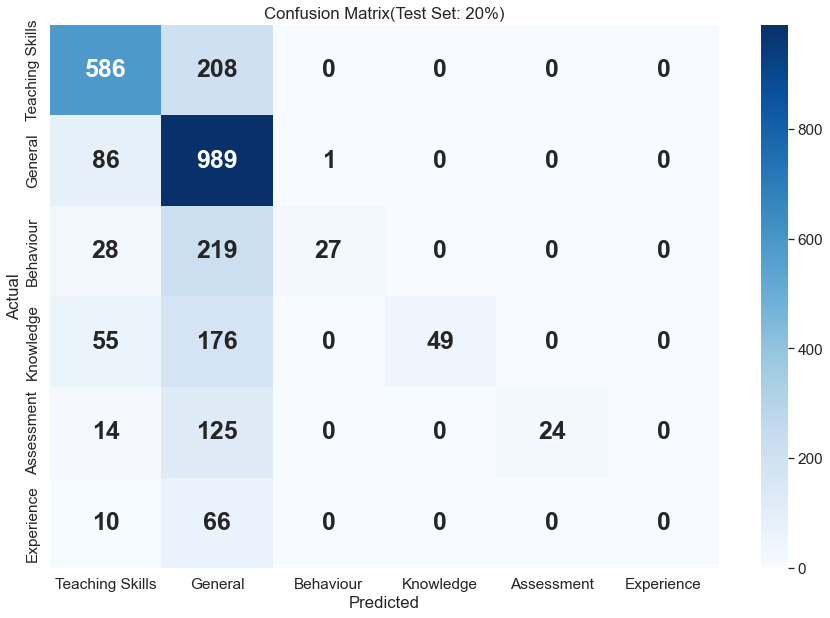

rfc : 0.8253849042433345

Classification Report: 
               precision    recall  f1-score   support

           1       0.84      0.83      0.84       794
           2       0.78      0.88      0.83      1076
           3       0.87      0.57      0.69       274
           4       0.87      0.84      0.86       280
           5       0.97      0.88      0.92       163
           6       0.83      0.66      0.74        76

    accuracy                           0.83      2663
   macro avg       0.86      0.78      0.81      2663
weighted avg       0.83      0.83      0.82      2663




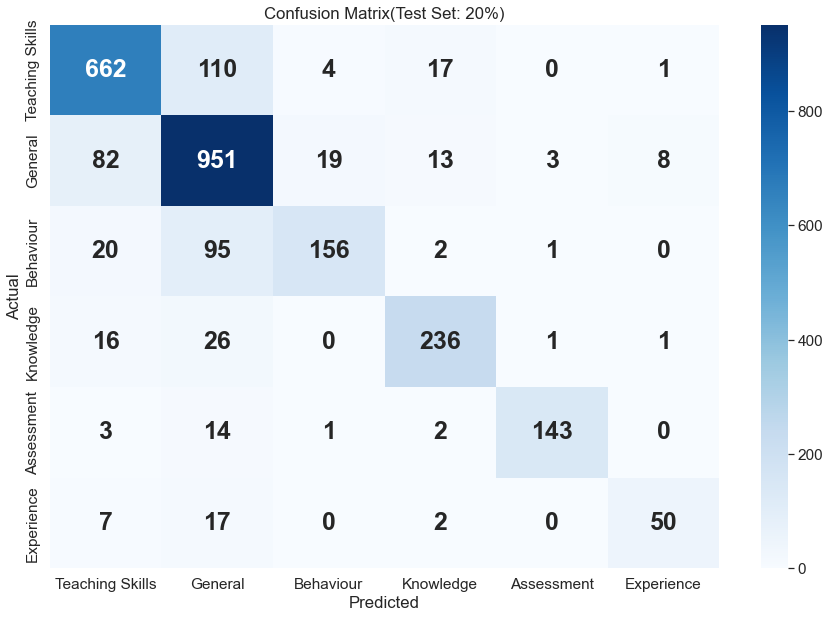

svm : 0.8332707472775066

Classification Report: 
               precision    recall  f1-score   support

           1       0.86      0.82      0.84       794
           2       0.79      0.89      0.84      1076
           3       0.84      0.65      0.73       274
           4       0.87      0.86      0.87       280
           5       0.97      0.85      0.91       163
           6       0.80      0.75      0.78        76

    accuracy                           0.83      2663
   macro avg       0.86      0.80      0.83      2663
weighted avg       0.84      0.83      0.83      2663




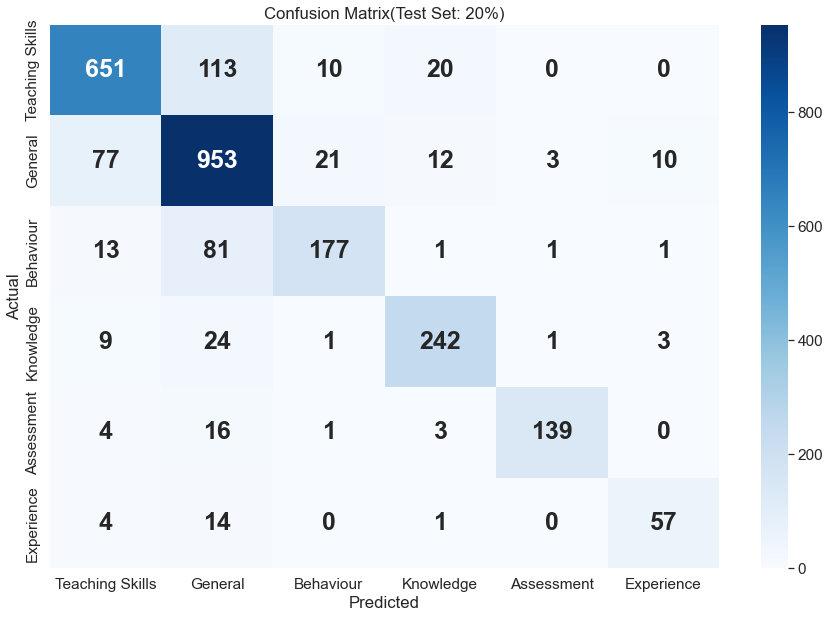

C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensamble : 0.8272624859181374

Classification Report: 
               precision    recall  f1-score   support

           1       0.85      0.82      0.83       794
           2       0.78      0.89      0.83      1076
           3       0.87      0.62      0.72       274
           4       0.88      0.84      0.86       280
           5       0.97      0.85      0.91       163
           6       0.80      0.70      0.75        76

    accuracy                           0.83      2663
   macro avg       0.86      0.79      0.82      2663
weighted avg       0.83      0.83      0.83      2663




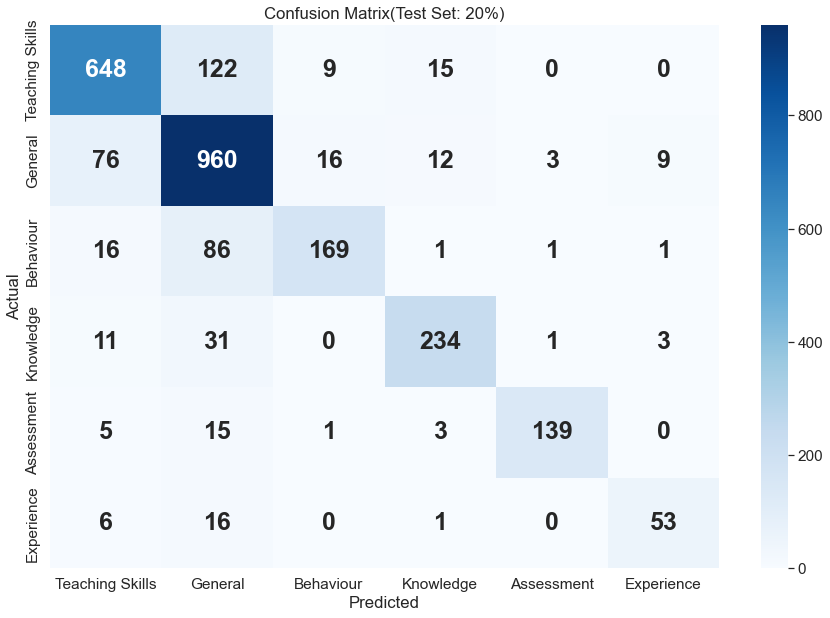

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

clfs = {
        'lr': LogisticRegression(), 
        'mnb': MultinomialNB(),   
        'rfc': RandomForestClassifier(), 
        'svm': SVC(kernel = 'linear', probability = True),
        'Ensamble' : VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                  ('rf', RandomForestClassifier()),
                                                  ('svm', SVC(kernel = 'linear', probability = True))], voting='hard')
 
       }

def test_clf(clf_dict, Xtrain, ytrain):
    for clf_name, clf in clf_dict.items():
        model = clf.fit(Xtrain, ytrain)
        filename = 'Models/'+clf_name+'_teacher_aspect_classification_final.sav'
        pickle.dump(model, open(filename, 'wb'))
        predicted = clf.predict(X_test)
        print(clf_name,":",np.mean(predicted == y_test))
        print()
        print("Classification Report: \n",classification_report(y_test, predicted))
        print() 
        labels = ['Teaching Skills', 'General', 'Behaviour', 'Knowledge', 'Assessment' , 'Experience']
        cm = confusion_matrix(y_test,predicted)
        df_cm = pd.DataFrame(cm, labels, labels)
        plt.figure(figsize=(15,10))
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 25, "weight":"bold"}, cmap='Blues', fmt='d') # font size
        plt.title('Confusion Matrix(Test Set: 20%)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
      
       
        
        
        
test_clf(clfs, X_train, y_train)

[1 2 3]
[2192  465    6]
[1 2 3]
[8671 1960   19]
lr : 0.9207660533233195

Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95      2192
           2       0.87      0.65      0.75       465
           3       0.00      0.00      0.00         6

    accuracy                           0.92      2663
   macro avg       0.60      0.54      0.57      2663
weighted avg       0.92      0.92      0.92      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


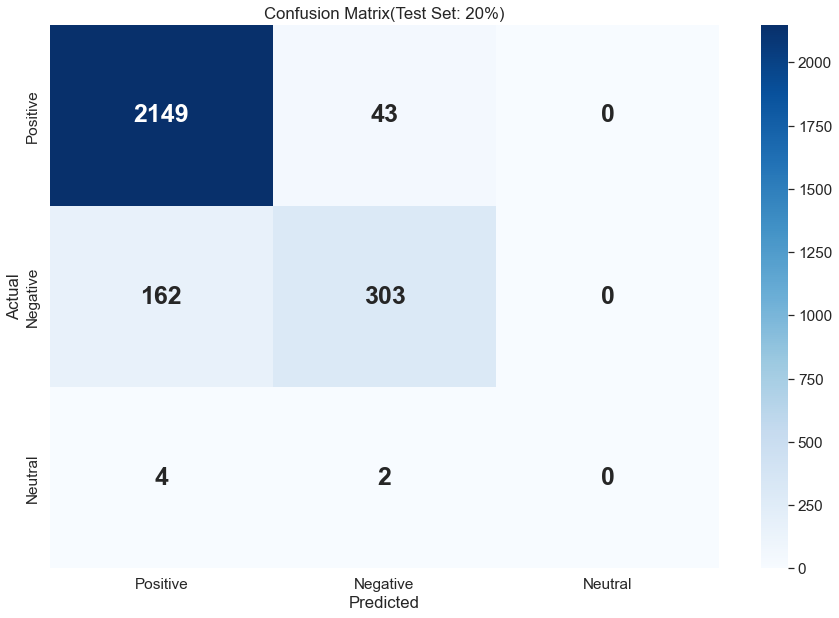

mnb : 0.8306421329327826

Classification Report: 
               precision    recall  f1-score   support

           1       0.83      1.00      0.91      2192
           2       1.00      0.04      0.08       465
           3       0.00      0.00      0.00         6

    accuracy                           0.83      2663
   macro avg       0.61      0.35      0.33      2663
weighted avg       0.86      0.83      0.76      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


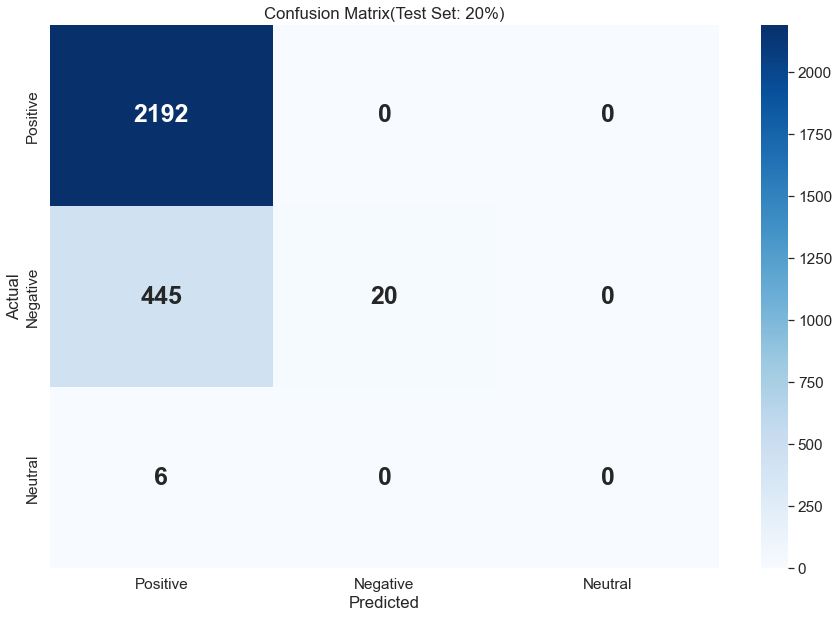

rfc : 0.9061209162598574

Classification Report: 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95      2192
           2       0.89      0.55      0.68       465
           3       0.00      0.00      0.00         6

    accuracy                           0.91      2663
   macro avg       0.60      0.51      0.54      2663
weighted avg       0.90      0.91      0.90      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


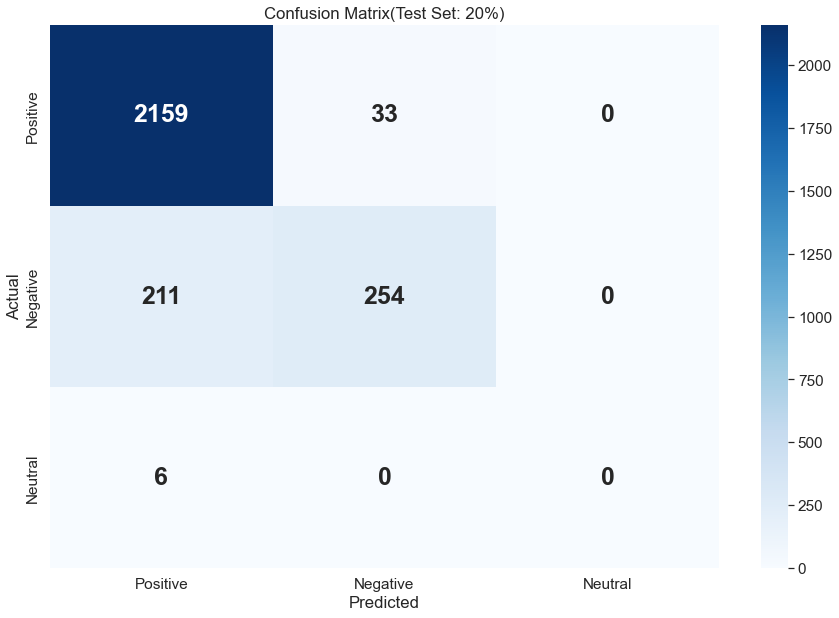

svm : 0.9226436349981224

Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95      2192
           2       0.85      0.69      0.76       465
           3       0.00      0.00      0.00         6

    accuracy                           0.92      2663
   macro avg       0.59      0.55      0.57      2663
weighted avg       0.92      0.92      0.92      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


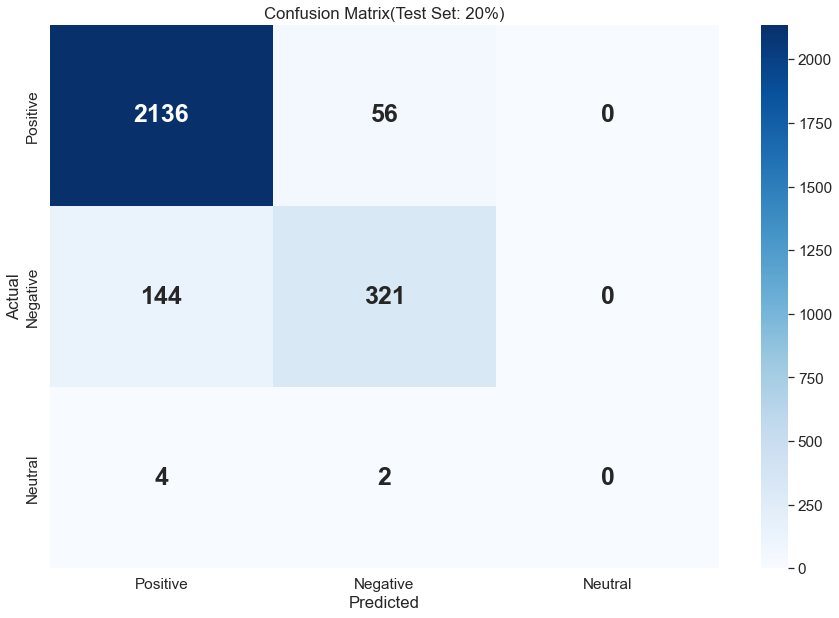

Ensamble : 0.9192639879834773

Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95      2192
           2       0.87      0.64      0.74       465
           3       0.00      0.00      0.00         6

    accuracy                           0.92      2663
   macro avg       0.60      0.54      0.56      2663
weighted avg       0.91      0.92      0.91      2663




C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarangs\Anaconda3\envs\anylogic\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


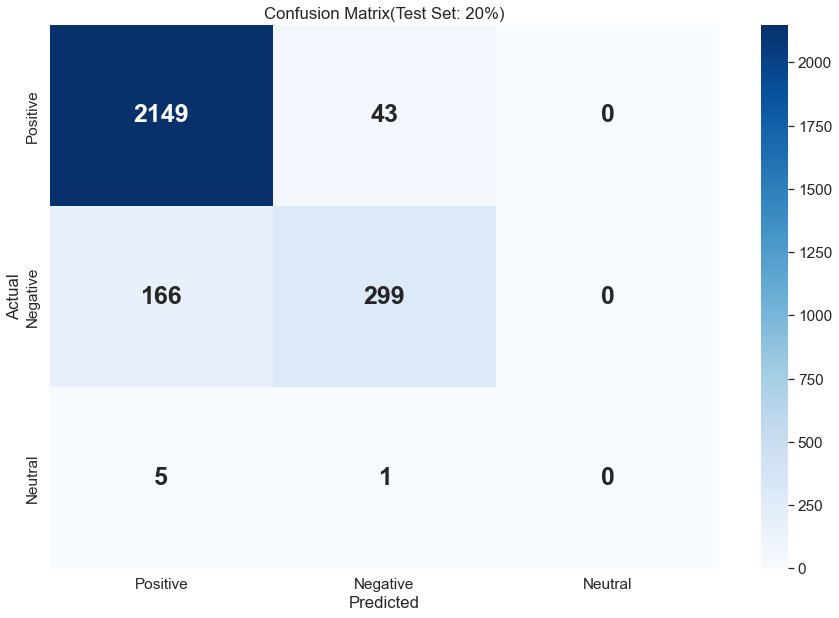

In [37]:
# Performance of Classifiers Using Train Test Split (Teacher Aspect Classification) 

#Data Splitting into Train Test Sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data_subset['sentiment_numeric'], test_size=0.2, random_state=42)

a, b = np.unique(y_test,return_counts=True)
print(a)
print(b)

a, b = np.unique(y_train,return_counts=True)
print(a)
print(b)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

clfs = {
        'lr': LogisticRegression(), 
        'mnb': MultinomialNB(),   
        'rfc': RandomForestClassifier(), 
        'svm': SVC(kernel = 'linear', probability = True),
        'Ensamble' : VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                  ('rf', RandomForestClassifier()),
                                                  ('svm', SVC(kernel = 'linear', probability = True))], voting='hard')
 
       }

def test_clf(clf_dict, Xtrain, ytrain):
    for clf_name, clf in clf_dict.items():
        model = clf.fit(Xtrain, ytrain)
        filename = 'Models/'+clf_name+'_teacher_sentiment_classification_final.sav'
        pickle.dump(model, open(filename, 'wb'))
        predicted = clf.predict(X_test)
        print(clf_name,":",np.mean(predicted == y_test))
        print()
        print("Classification Report: \n",classification_report(y_test, predicted))
        print() 
        labels = ['Positive', 'Negative', 'Neutral']
        cm = confusion_matrix(y_test,predicted)
        df_cm = pd.DataFrame(cm, labels, labels)
        plt.figure(figsize=(15,10))
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 25, "weight":"bold"}, cmap='Blues', fmt='d') # font size
        plt.title('Confusion Matrix(Test Set: 20%)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
      
       
        
        
        
test_clf(clfs, X_train, y_train)